In [20]:
from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt

# Pipeline
The pipeline to PCA are roughly:
raw data -> scaling -> PCA -> check variance -> visualize -> sanity checks

# Trial with Dataset
## Iris
### Step 1: Load Data

In [13]:
data = load_iris()
X = data.data
y = data.target

In [8]:
X.shape

(150, 4)

### Step 2: Scale data
PCA is based on variance. Without scaling:
- features with large units dominate
- PCA becomes meaningless

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 3: Apply PCA (start with 2 components)
What we do:
- n_components = 2
- transform scaled data

PCA will find new axes which captures maximum variance and the axes are orthogonal (independent) to each other. For iris, we go from 150x4 to 150x2

In [9]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [10]:
print(X_pca.shape)

(150, 2)


We can see that the dimension is reduced to only 2 feature

### Step 4: Evaluate PCA
We should check if PCA actually compress information well. We check for explained variance ratio

In [11]:
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)
print("Explained Variance Ratio: ", pca.explained_variance_ratio_.sum())

Explained Variance Ratio:  [0.72962445 0.22850762]
Explained Variance Ratio:  0.9581320720000164


These explain:
- PC1 capture 73% of total variance
- PC2 capture  23% of total variance
- These 2 components capture 96% of the total variance present in the original 4 features
- The remaining 4% is discarded

Variance = how much the data spreads out
High variance directions = where data points differ a lot
Low variance directions = mostly noise and redundant information

PCA assumes directions with higher variance are more informative than directions with very little variance

### Step 5: Visualize PCA Result

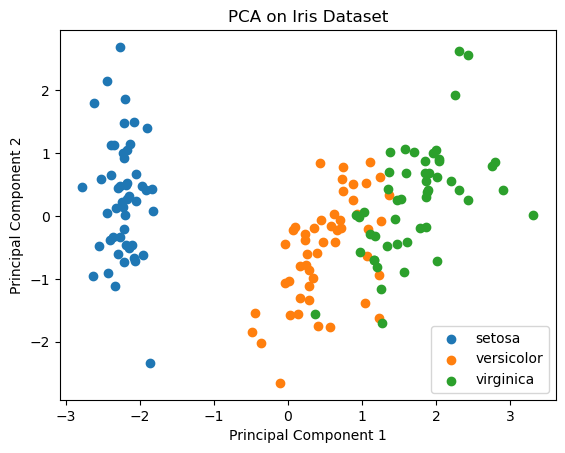

In [15]:
plt.figure()
for label in np.unique(y):
    plt.scatter(
        X_pca[y==label, 0],
        X_pca[y==label, 1],
        label=data.target_names[label]
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.legend()
plt.show()

PCA does not try to separate cluster, this is just a visual check of how the two new pca components describe the iris label. We should see that the points are spread out and the classes showed some separation. It is a bad sign if everything collapsed into a blob. It is important to know that PCA does not guarantee class separation as it is only preserves variance in data.

Separation is good but no separation does not mean PCA failed

### Step 5: Scree Plot
To determine how many components we should keep. It's like choosing number of k for K-Means. We plot importance against the component number and identifying the elbow where the graph sharply bends and then flattens.

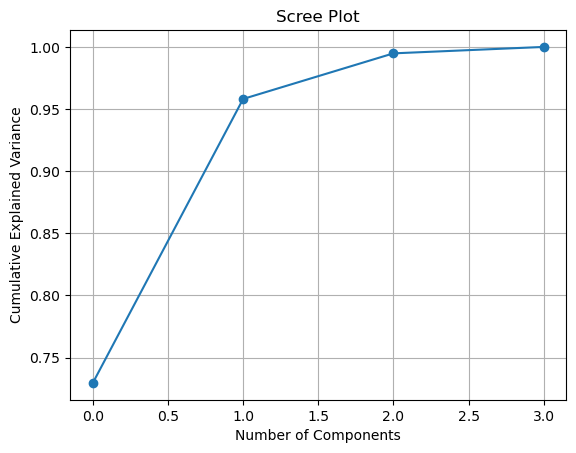

In [17]:
pca_full = PCA(n_components=4)
pca_full.fit(X_scaled)

plt.figure()
plt.plot(
    np.cumsum(pca_full.explained_variance_ratio_),
    marker='o'
)

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

To interpret, we look for where the curve flattens. For 2 components = 95% and 3 components = 99%. This is how we justify n_components in reports/interview.

This tool is mainly a decision aid and a justification tool, not a mathematically exact rule

## Wine
We will use the same steps, but we will do scree plot before PCA

In [21]:
data = load_wine()
X = data.data
y = data.target

In [24]:
#check number of features
X.shape

(178, 13)

In [28]:
#scale the data
X_scaled = scaler.fit_transform(X)

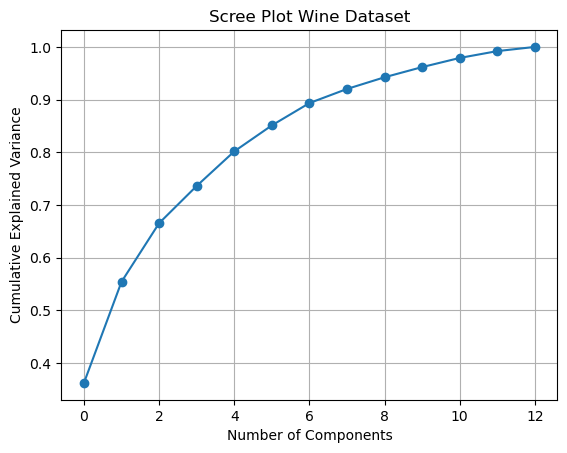

In [29]:
pca_full = PCA(n_components = 13)
pca_full.fit(X_scaled)

plt.figure()
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot Wine Dataset")
plt.grid()
plt.show()

Just like what we learned so far, there is also no right answer for PCA, we can choose any number of components and each has its own trade-off. Using 5 components with 80% variance, the calculation will be simpler, smaller dimension meaning easier to plot, but 80% maybe not enough variance in some cases. Using 7 components with 90% retain good enough variance and can improve performance.

In practice, we can do trial and error. Take clustering for example, try both 5 and 7 components to do clustering with K-Means. If the clusters structure look similar, pick 5 as it is simpler. However, if 7 components resulted in significant model improvement, pick 7. Scree plot just narrows the search, it does not end it.

### PCA 4 Components

In [33]:
pca = PCA(n_components=5)
X_pca_5 = pca.fit_transform(X_scaled)

X_pca_5.shape

(178, 5)

In [34]:
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)
print("Explained Variance Ratio: ", pca.explained_variance_ratio_.sum())

Explained Variance Ratio:  [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294]
Explained Variance Ratio:  0.8016229275554789


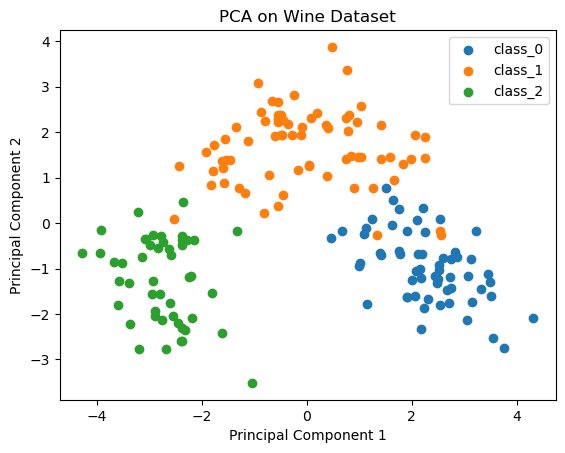

In [41]:
plt.figure()
for label in np.unique(y):
    plt.scatter(
        X_pca_5[y==label, 0],
        X_pca_5[y==label, 1],
        label=data.target_names[label]
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.legend()
plt.show()

### PCA 7 Components

In [37]:
pca = PCA(n_components=7)
X_pca_7 = pca.fit_transform(X_scaled)

X_pca_7.shape

(178, 7)

In [38]:
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)
print("Explained Variance Ratio: ", pca.explained_variance_ratio_.sum())

Explained Variance Ratio:  [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679]
Explained Variance Ratio:  0.8933679539739376


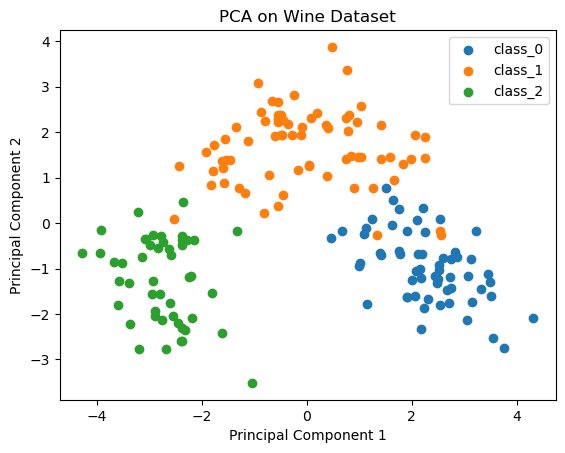

In [39]:
plt.figure()
for label in np.unique(y):
    plt.scatter(
        X_pca_5[y==label, 0],
        X_pca_5[y==label, 1],
        label=data.target_names[label]
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.legend()
plt.show()

# Summary
PCA is a method to reduce dimension by transforming the dataset and keeping a number of components that captures the entire features' variance. We can use scree plot to help determine how much PCA components we should keep and how much variance will each of them retain. There are no 1 correct way to choose and each number of components has its trade-offs.

PCA is fundamentally for numerical features. If the dataset has categorical features, it is better to separate the numerical and categorical, PCA the numerical, encode the categorical, and then combine both. This is the most common and safest approach. There are several method to use for mixed features, one of them is autoencoders, which is essential for neural network pipeline

One thing to know, PCA is not applicable for all kinds of data. PCA transformed the features into new features. It compresses data but removes interpretability. PCA won't be useful for cases where interpretability is required. Cases where PCA is acceptable:
- image data
- signal processing
- clustering / visualization
- recommendation systems

Basically, PCA shines where there are no explanations required